<a href="https://colab.research.google.com/github/Shrinandmat/Machine-Learning/blob/main/credit_card_fraud_detection_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [63]:
data = pd.read_csv("/content/creditcard.csv")


In [64]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [65]:
print(data.shape)

(85259, 31)


In [66]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,...,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85259.000000,85258.000000,85258.000000,85258.000000,85258.000000
mean,38698.541691,-0.262585,-0.039207,0.679054,0.163611,-0.277616,0.094861,-0.111651,0.054145,-0.021205,...,-0.029273,-0.105613,-0.037762,0.008986,0.133598,0.026270,0.001449,0.001934,98.374057,0.002393
std,15668.300002,1.878484,1.670189,1.366683,1.363280,1.375170,1.303646,1.237707,1.223035,1.135023,...,0.731860,0.635127,0.626519,0.595040,0.441017,0.497236,0.389486,0.328312,268.381509,0.048857
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,31595.000000,-1.025883,-0.602941,0.184642,-0.722311,-0.896999,-0.644375,-0.603378,-0.140721,-0.690902,...,-0.223696,-0.524879,-0.178156,-0.322420,-0.130610,-0.326403,-0.063467,-0.005899,7.680000,0.000000
50%,41180.000000,-0.258057,0.069615,0.762733,0.186825,-0.311837,-0.155047,-0.072501,0.070103,-0.097017,...,-0.057764,-0.080822,-0.049921,0.064547,0.171852,-0.072601,0.009302,0.022947,26.990000,0.000000
75%,50942.000000,1.153099,0.724933,1.390659,1.042062,0.257707,0.488674,0.416990,0.352738,0.602616,...,0.118290,0.309640,0.080706,0.405794,0.421184,0.306305,0.082480,0.076063,89.900000,0.000000
max,60684.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [73]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0023984762621393468
Fraud Cases: 204
Valid Transactions: 85054


In [70]:
fraud.Amount.describe()

count     204.000000
mean      101.986814
std       229.008970
min         0.000000
25%         1.000000
50%         7.550000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [71]:
valid.Amount.describe()

count    85054.000000
mean        98.365392
std        268.470093
min          0.000000
25%          7.690000
50%         27.000000
75%         89.800000
max      19656.530000
Name: Amount, dtype: float64

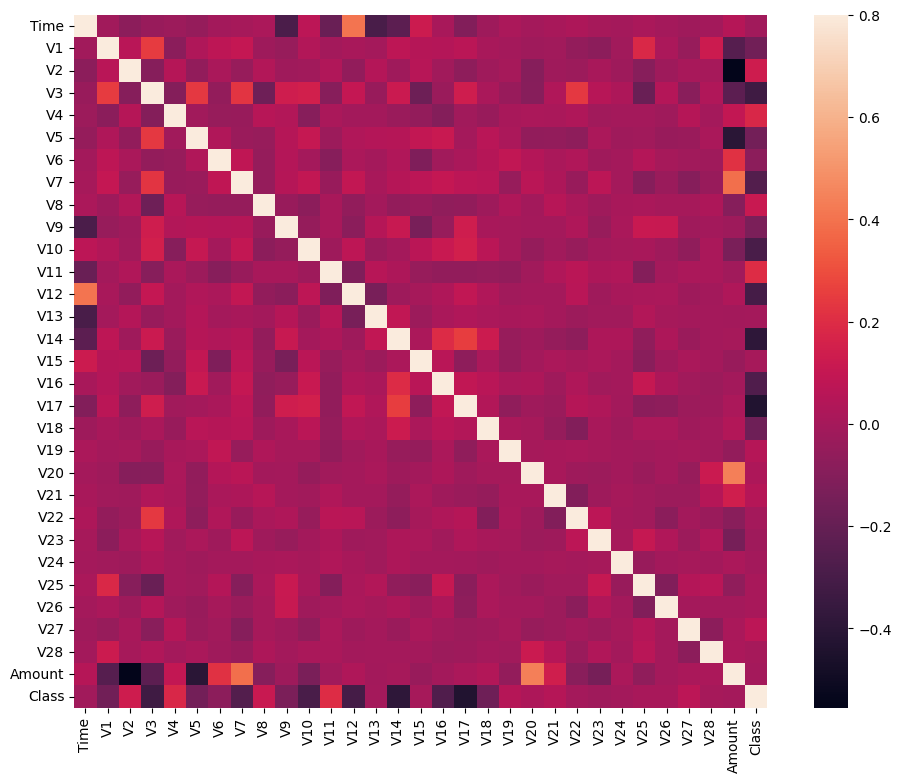

In [72]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()